In [1]:
# %load tools.py
from matplotlib import pyplot as plt
from matplotlib.colors import to_rgb
import numpy as np
import pandas as pd
import cv2
import imutils

# https://matplotlib.org/users/colors.html
def color(c):
    return tuple(int(x*255) for x in to_rgb(c))

def df_contours(cnts):
    df = pd.DataFrame(columns=['cx','cy', 'left', 'right', 'bottom', 'top', 'w', 'h'])
    for i, c in enumerate(cnts):
        M = cv2.moments(c)
        if np.isclose(M["m00"], 0.0):
            cx, cy = np.nan, np.nan
        else:
            cx, cy = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])
        x, y, w, h = cv2.boundingRect(c)
        df.loc[i] = pd.Series({'cx': cx, 'cy': cy, 'left': x, 'top': y, 
                               'w': w, 'h': h, 'bottom': y+h, 'right': x+w})
    return df

def df_image(image):
    df = pd.DataFrame(columns=['cx','cy', 'left', 'right', 'bottom', 'top', 'w', 'h'])
    

def center(df, i=0, offset=0):
    return tuple(df.loc[i, ['cx','cy']] + offset)

def lt(df, i=0, offset=0):
    '''Left Top'''
    return tuple(df.loc[i, ['left','top']] + offset)

def rb(df, i=0, offset=0):
    '''Right Bottom'''
    return tuple(df.loc[i, ['right','bottom']] + offset)

def plot_images(images):
    fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
    for ax, im in zip(axes.flat, images):
        if len(im.shape) == 3:
            ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        elif len(im.shape) == 2:
            ax.imshow(im, cmap='gray')
    plt.show()



In [2]:
%matplotlib inline

In [3]:
# https://www.pyimagesearch.com/2015/08/10/checking-your-opencv-version-using-python/
print('cv2: ', cv2.__version__)
print('imutils: ', imutils.__version__)
print("Are you using OpenCV 3.X? {}".format(imutils.is_cv3()))

cv2:  3.3.1
imutils:  0.4.5
Are you using OpenCV 3.X? True


### Color from string

In [4]:
print('red:', color('red'))
print('blue:', color('blue'))
print('green:', color('g'))

red: (255, 0, 0)
blue: (0, 0, 255)
green: (0, 127, 0)


### Draw countours

- cv2.[threshold](https://docs.opencv.org/3.3.1/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57), [Thresholding Tutorial](https://docs.opencv.org/3.3.1/d7/d4d/tutorial_py_thresholding.html)
- cv2.[findContours](https://docs.opencv.org/3.3.1/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a)

In [5]:
image = cv2.imread("drawing.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshval, maxval = (127, 255)
_, thresh = cv2.threshold(gray, threshval, maxval, cv2.THRESH_BINARY_INV)

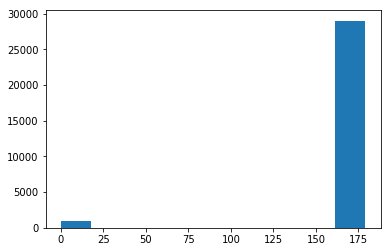

In [6]:
_ = plt.hist(gray.ravel())

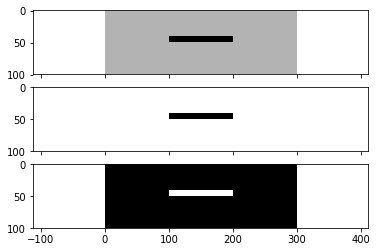

In [7]:
plot_images([image, gray, thresh])

In [8]:
(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

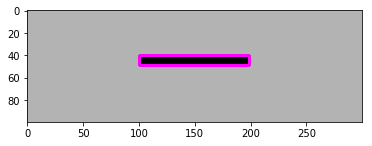

In [9]:
_ = cv2.drawContours(image, cnts, -1, color('magenta'), 2)
plt.imshow(image)

In [10]:
df = df_contours(cnts)
df

,cx,cy,left,right,bottom,top,w,h
0,149,44,100,200,50,40,100,10


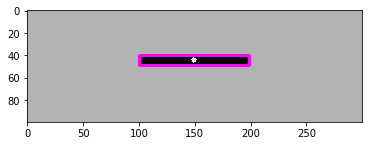

In [11]:
cv2.circle(image, center(df), 2, color('w'), -1)
plt.imshow(image)

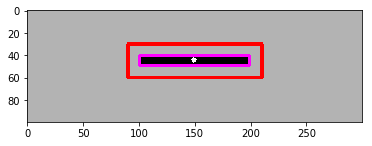

In [12]:
cv2.rectangle(image, lt(df, offset=-10), rb(df, offset=10), color('red'), 2)
plt.imshow(image)

### Multiple Contours
cv2.findContours

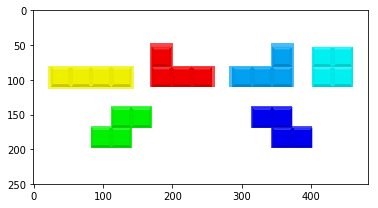

In [13]:
image = cv2.imread("tetris_blocks.png")
plt.imshow(image)

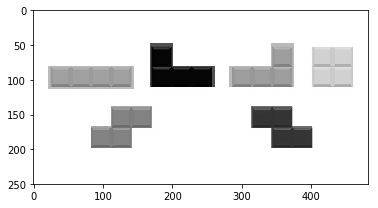

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

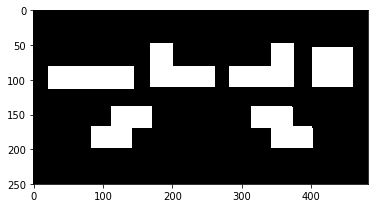

In [15]:
(_, thresh) = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

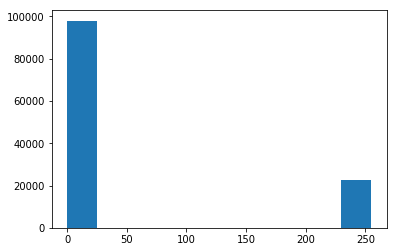

In [16]:
_ = plt.hist(thresh.ravel())

In [17]:
(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
df = df_contours(cnts)
df

,cx,cy,left,right,bottom,top,w,h
0,357,167,314,403,198,138,89,60
1,126,167,83,171,198,138,88,60
2,83,96,22,146,113,80,124,33
3,430,81,402,460,111,53,58,58
4,337,86,282,376,111,48,94,63
5,205,86,168,262,111,48,94,63


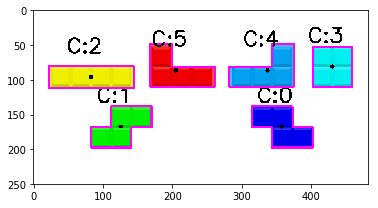

In [19]:
# https://docs.opencv.org/3.3.1/d6/d6e/group__imgproc__draw.html
thickness = 2
# Negative thickness means that a filled circle is to be drawn.
circle_thickness, radius = -1, 3
# Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
contourIdx = -1
# Text properties
fontScale, offset, font = 1, -35, cv2.FONT_HERSHEY_SIMPLEX

# loop over the contours
for i, c in enumerate(cnts):
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, cnts, i, color('magenta'), thickness)
    cv2.circle(image, center(df, i), radius, color('black'), circle_thickness)
    cv2.putText(image, 'C:{}'.format(i), center(df, i, offset=offset), 
                font, fontScale, color('black'), thickness)

plt.imshow(image)

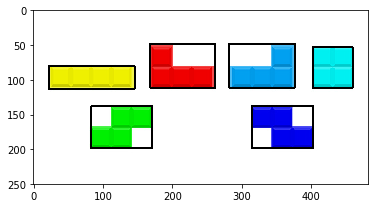

In [20]:
image = cv2.imread("tetris_blocks.png")
for i, c in enumerate(cnts):
    cv2.rectangle(image, lt(df, i), rb(df, i), color('black'), 2)
plt.imshow(image)